# Analyzing Historical Rainfall in Palo Alto, CA with CHIRPS Data

In this Notebook we demonstrate how you can use Climate Hazards Group InfraRed Precipitation With Station (CHIRPS) data. CHIRPS is a 30+ year quasi-global rainfall dataset that enables comparing current rainfall patters with historical averages providing very accurate results. Palo Alto is used as an example location, but we encourage you try out other locations. 

Palo Alto has a Mediterranean climate with cool, relatively wet winters and warm, dry summers. However, because the city is located next to the Santa Cruz Mountains that block the passage of rain-producing weather system, there is a so-called __[rain shadow](https://en.wikipedia.org/wiki/Rain_shadow)__ in Palo Alto resulting in a very low average annual rainfall. 

We will make several plots which show how precipitation can differ during one year and between different years. Note that this notebook is using Python 3.

First of all, we are importing some modules

In [1]:
%matplotlib notebook
import pandas as pd
import numpy
from po_data_process import get_data_from_point_API, make_histogram, make_plot
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

<font color='red'>Please put your datahub API key into a file called APIKEY and place it to the notebook folder or assign your API key directly to the variable API_key!</font>

Here we define dataset_key and point of interest. 

In [2]:
API_key = open('APIKEY').read().strip()
dataset_key = 'chg_chirps_global_05'
#Palo Alto
latitude = 37.42
longitude = -122.17

Now it's time to read the actual data as Pandas DataFrame. We add separate columns for 'year' and 'month' for later use. For reading the data, we use function *get_data_from_point_API*  from module named *get_data_from_point_API*  which is in the Notebook folder (the same folder where this script is located in GitHub). At the end of this box we also print out Pandas data structure so that you can see how it looks like.

In [3]:
data = get_data_from_point_API(dataset_key, longitude, latitude, API_key)
data['time'] = pd.to_datetime(data['time'])
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data = data.loc[data['year'] < 2019] 
print (data.keys())

http://api.planetos.com/v1/datasets/chg_chirps_global_05/point?lat=37.42&lon=-122.17&apikey=8428878e4b944abeb84790e832c633fc&count=100000&z=all&verbose=False
Index(['context', 'axes', 'latitude', 'longitude', 'time', 'precip', 'year',
       'month'],
      dtype='object')


Now that we have fetched the time-series of precipitation data, we can easily compute the following statistics:
1. Number of completely dry days since 1981
2. Number of completely dry days by year
3. Number of days with more than 20 mm precipitation in a year
4. Annual precipitation by year
5. Daily maximum precipitation by year
6. Average annual cycle of precipitation
7. Histogram


In [4]:
print ('There have been ' + str(len(data.loc[data['precip'] == 0])) + ' completely dry days in Palo Alto of ' + str(len(data)) + ' total.')
print ('It means that ' + str(round((100. * len(data.loc[data['precip'] == 0]))/len(data),2)) +  '% of the days since 1981 have been completely dry in Palo Alto.')

There have been 12526 completely dry days in Palo Alto of 13879 total.
It means that 90.25% of the days since 1981 have been completely dry in Palo Alto.


The following plot will show the number of days by year with no observed precipitation. We can see that the difference between the years is not significant. 

<IPython.core.display.Javascript object>


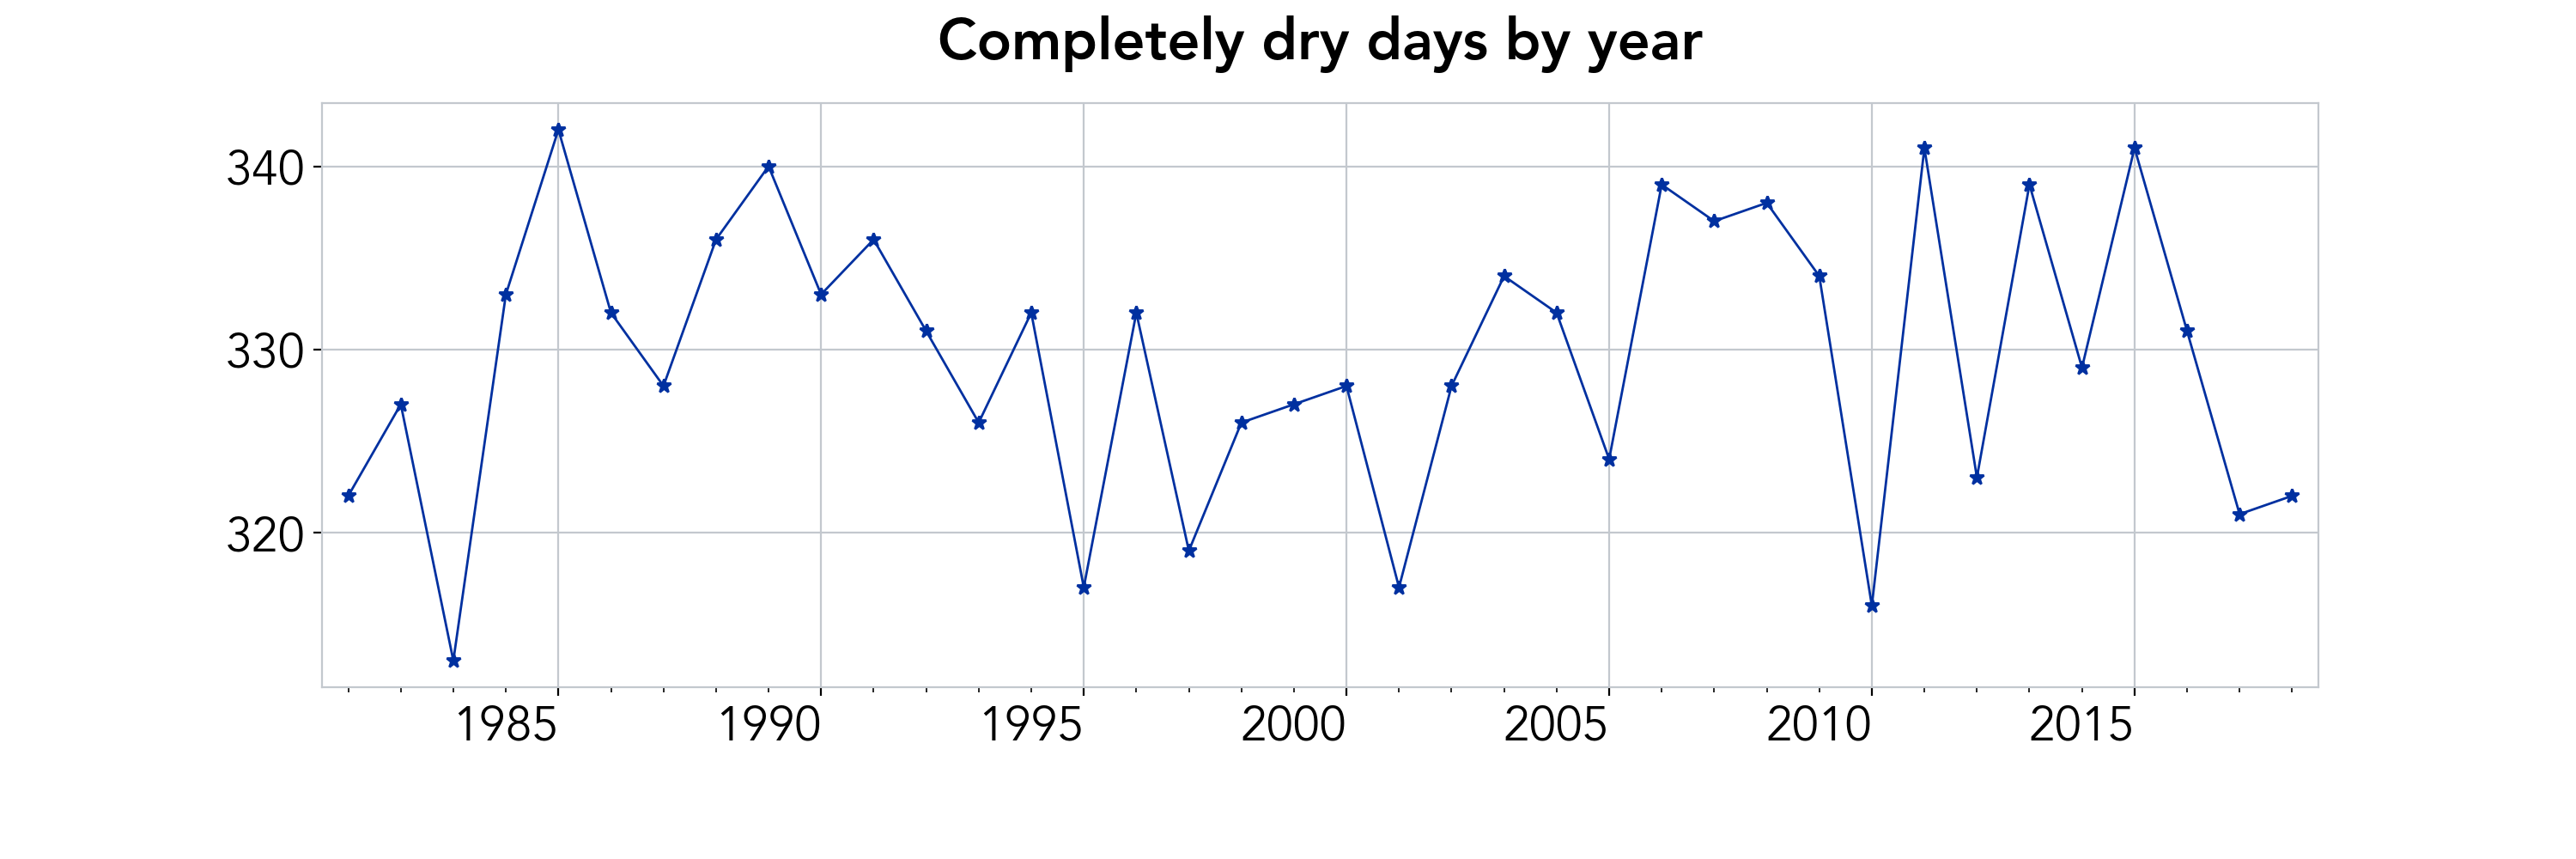

In [5]:
make_plot(data.loc[data['precip'] == 0].groupby('year').count()['precip'],dataset_key,'Completely dry days by year')

In this plot we look at how many days had more than 20 mm precipitation in a year. In 1998, one of the strongest El Niño years in the recent history, is the clear winner. __[Daniel Swain](http://weatherwest.com/about)__ also brought out  __[the fact](http://weatherwest.com/archives/3836)__ in his Weather West blog that California’s wettest years on record were 1982-1983 and 1997-1998, and they occurred during the strongest El Niño years. Those years clearly stand out in our demo as well.

Daniel also says that the common belief that El Niño always brings a lot of water to the Golden State is not particularly true. It does, however, increase the potential of more precipitation.

For example, the years 2015-2016 when the El Niño was very strong, don't stand out in this plot. The unusal precipitation pattern of 2016 was also __[discussed by Daniel Swain in his blogpost](http://weatherwest.com/archives/tag/el-nino-california)__, because curiously, it was almost the opposite of what was expected based upon theoretical and empirical models for ENSO teleconnections.

<IPython.core.display.Javascript object>


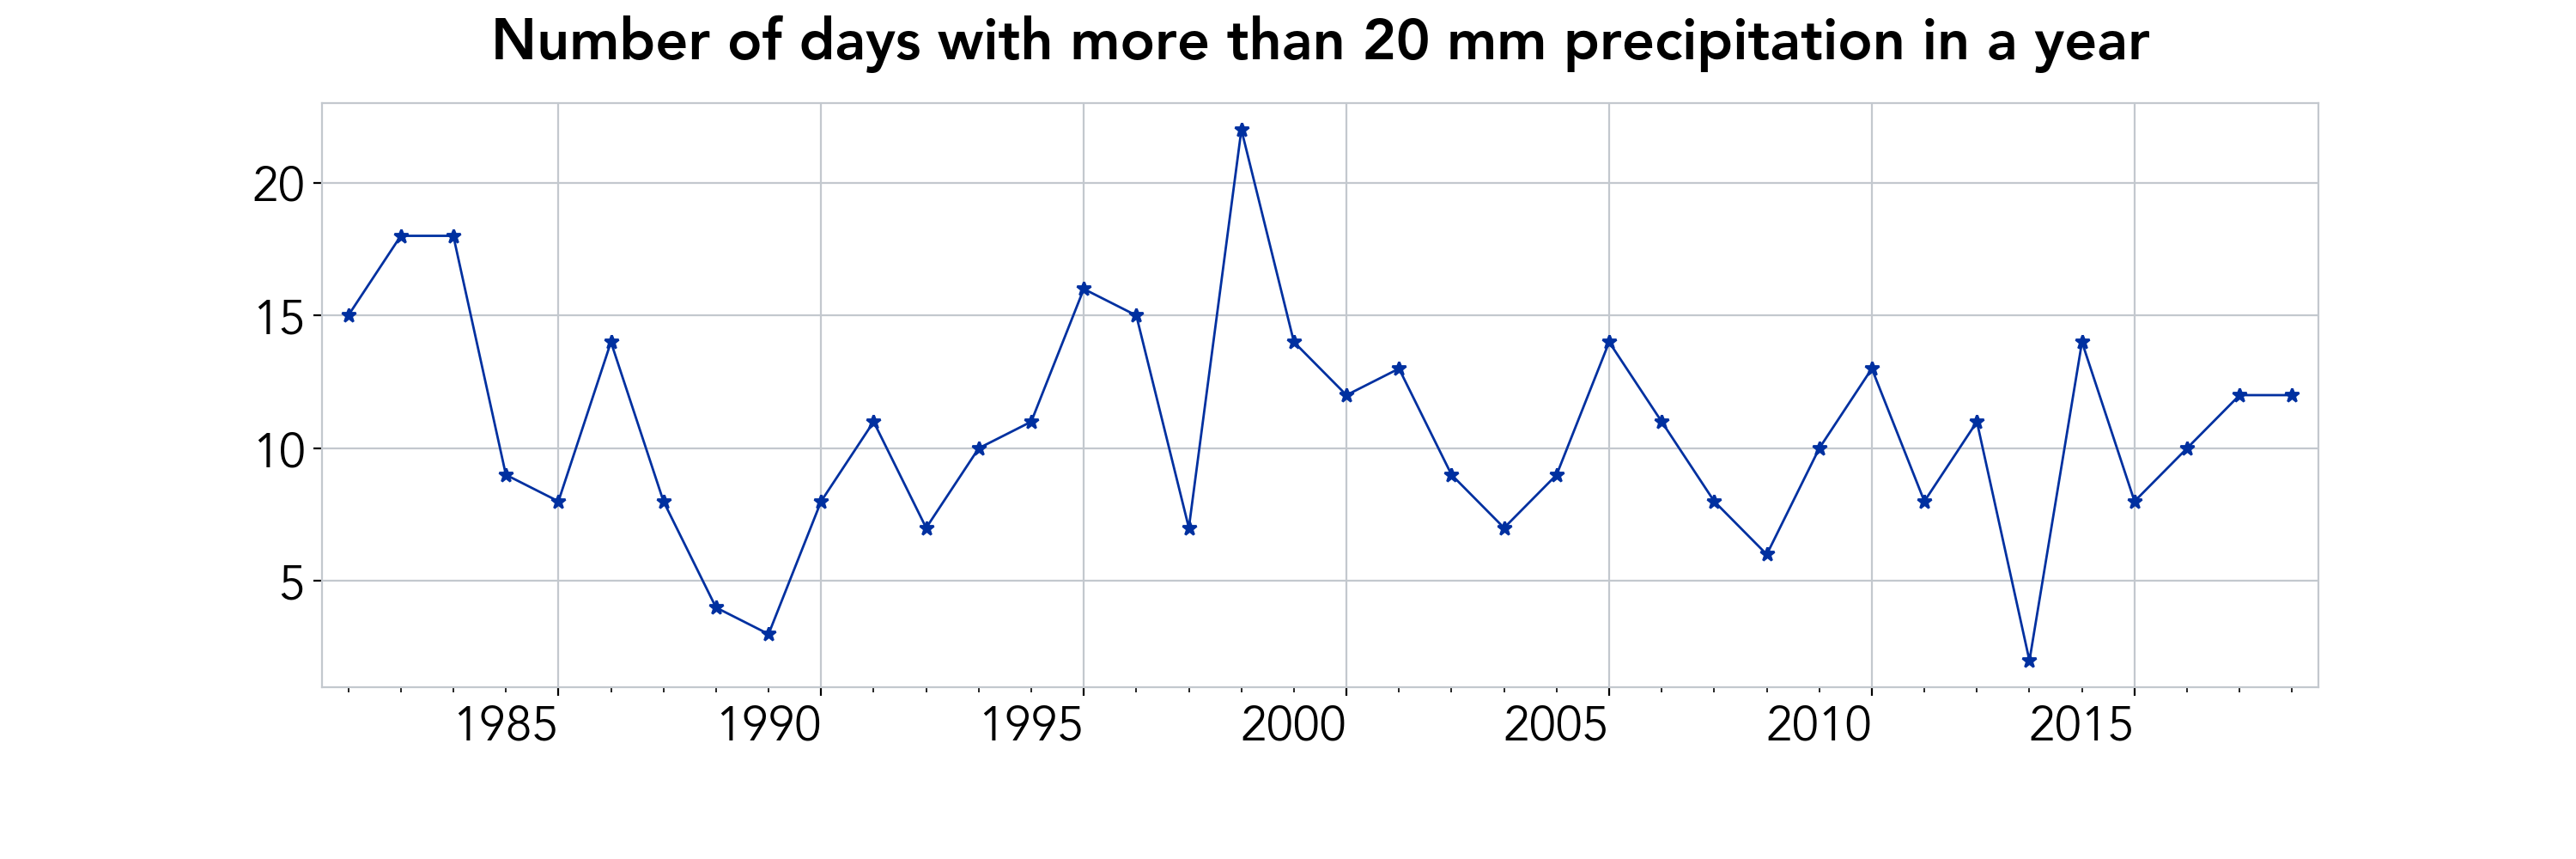

In [6]:
make_plot(data.loc[data['precip'] > 20].groupby('year').count()['precip'],dataset_key,'Number of days with more than 20 mm precipitation in a year')


The next plot is about annual total precipitation. Two from the three driest years in the whole period, 2013 and 2015, have been very recent. 1998 has been among the strongest and is exceeded only by the exceptionally large values of 1982 and 1983. Those, again, were strongest El Niño years we talked about above. The El Niño of 2015-2016 still doesn't stand out. 

<IPython.core.display.Javascript object>


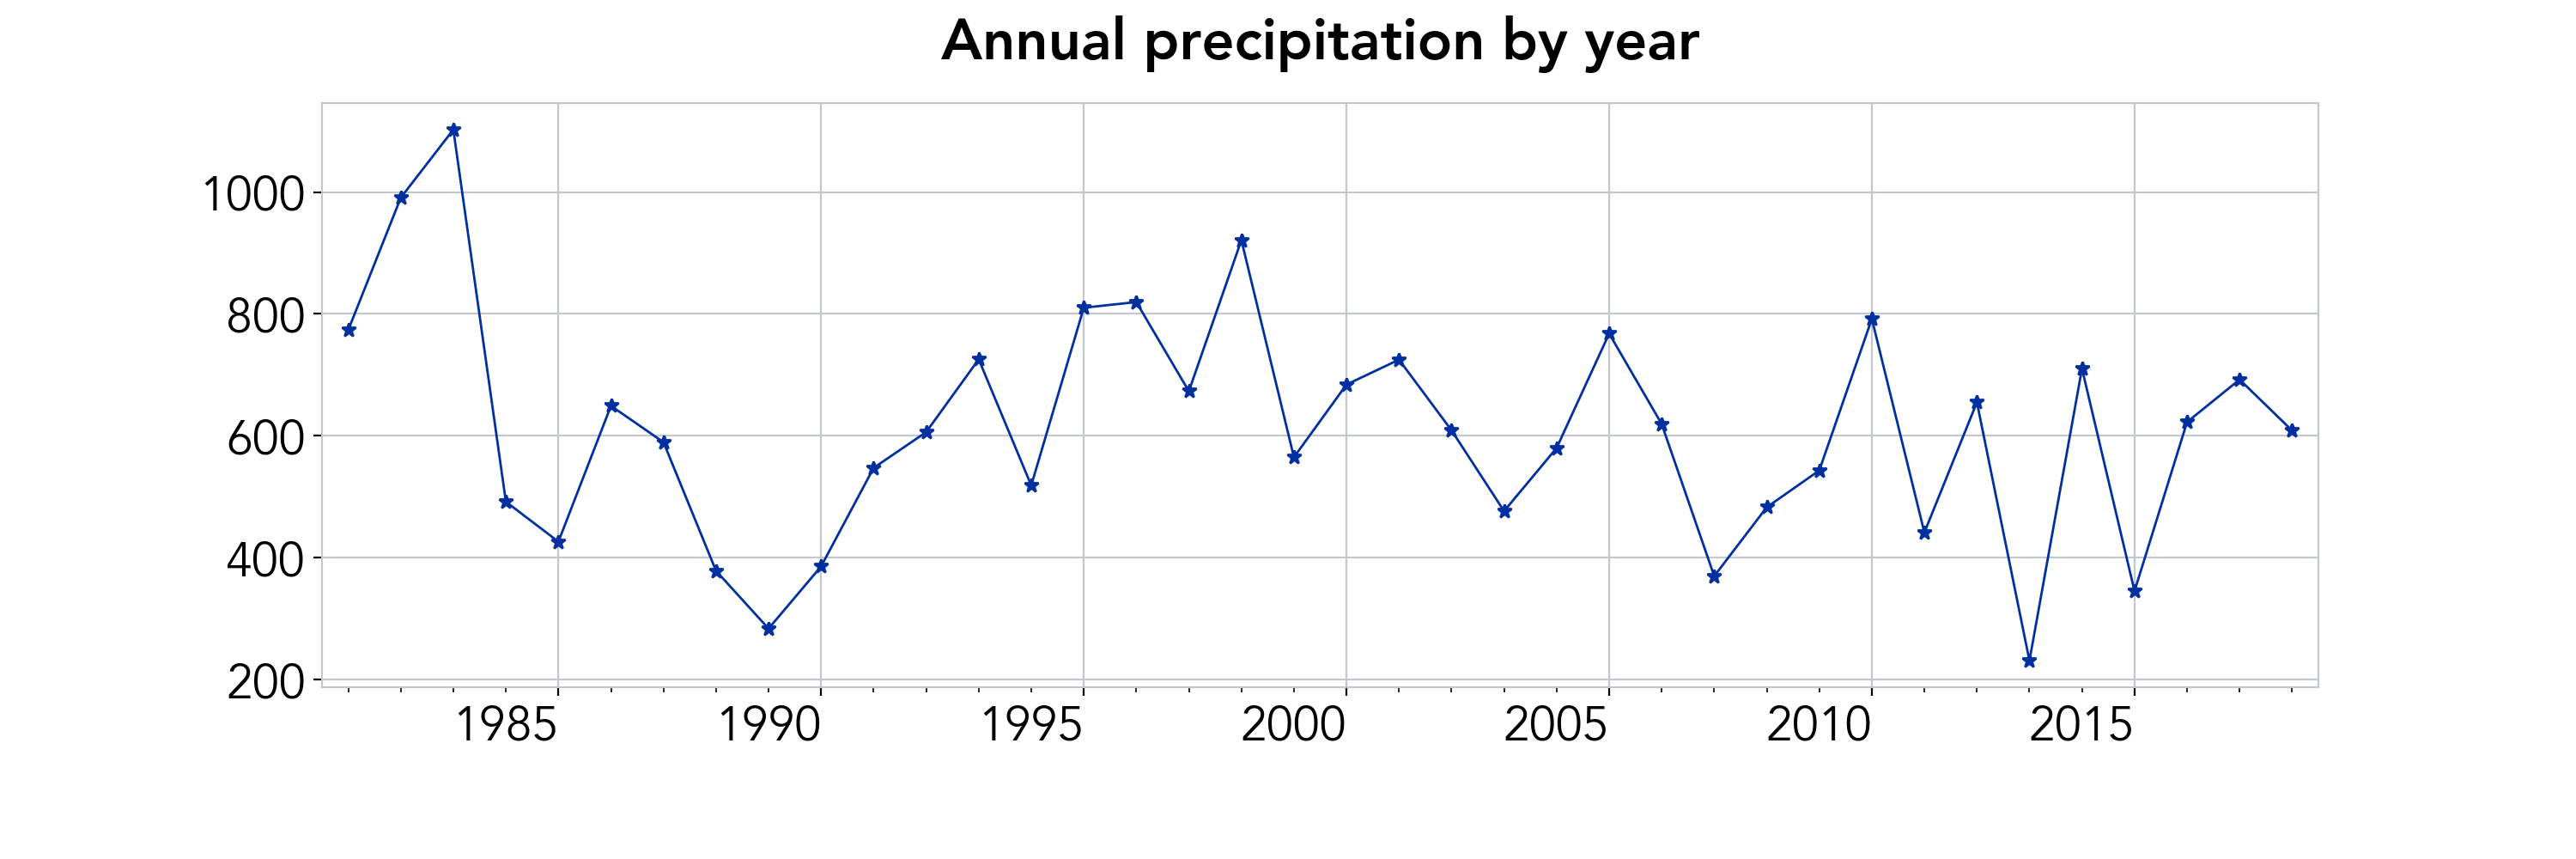

In [7]:
make_plot(data.groupby('year').sum()['precip'],dataset_key,'Annual precipitation by year')


Daily maximum precipitation was on 1982. Again, this plot confirms results from previous plots. 

<IPython.core.display.Javascript object>


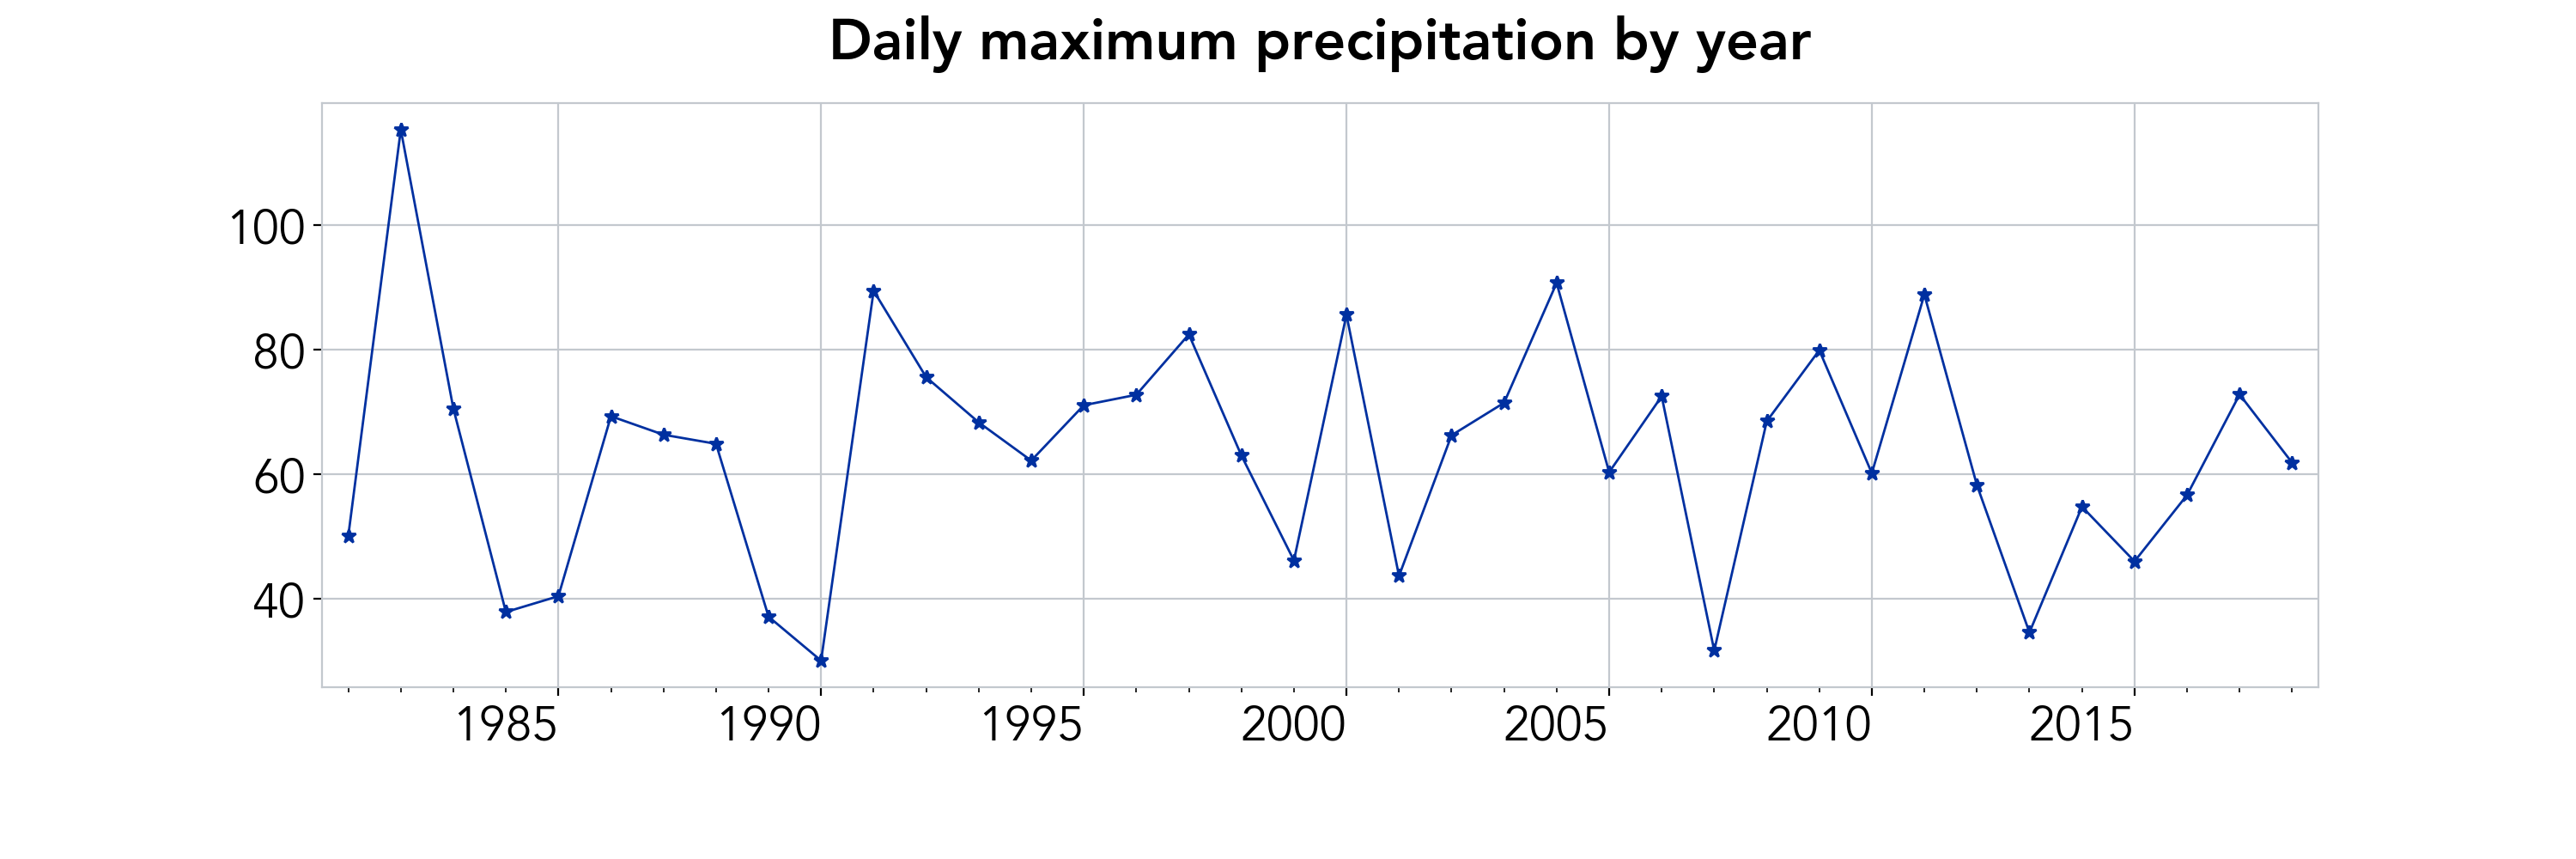

In [8]:
make_plot(data.groupby('year').max()['precip'],dataset_key,'Daily maximum precipitation by year')

The average annual cycle of precipitation shows that it mostly rains during the winter months and the summer is usually dry.

<IPython.core.display.Javascript object>


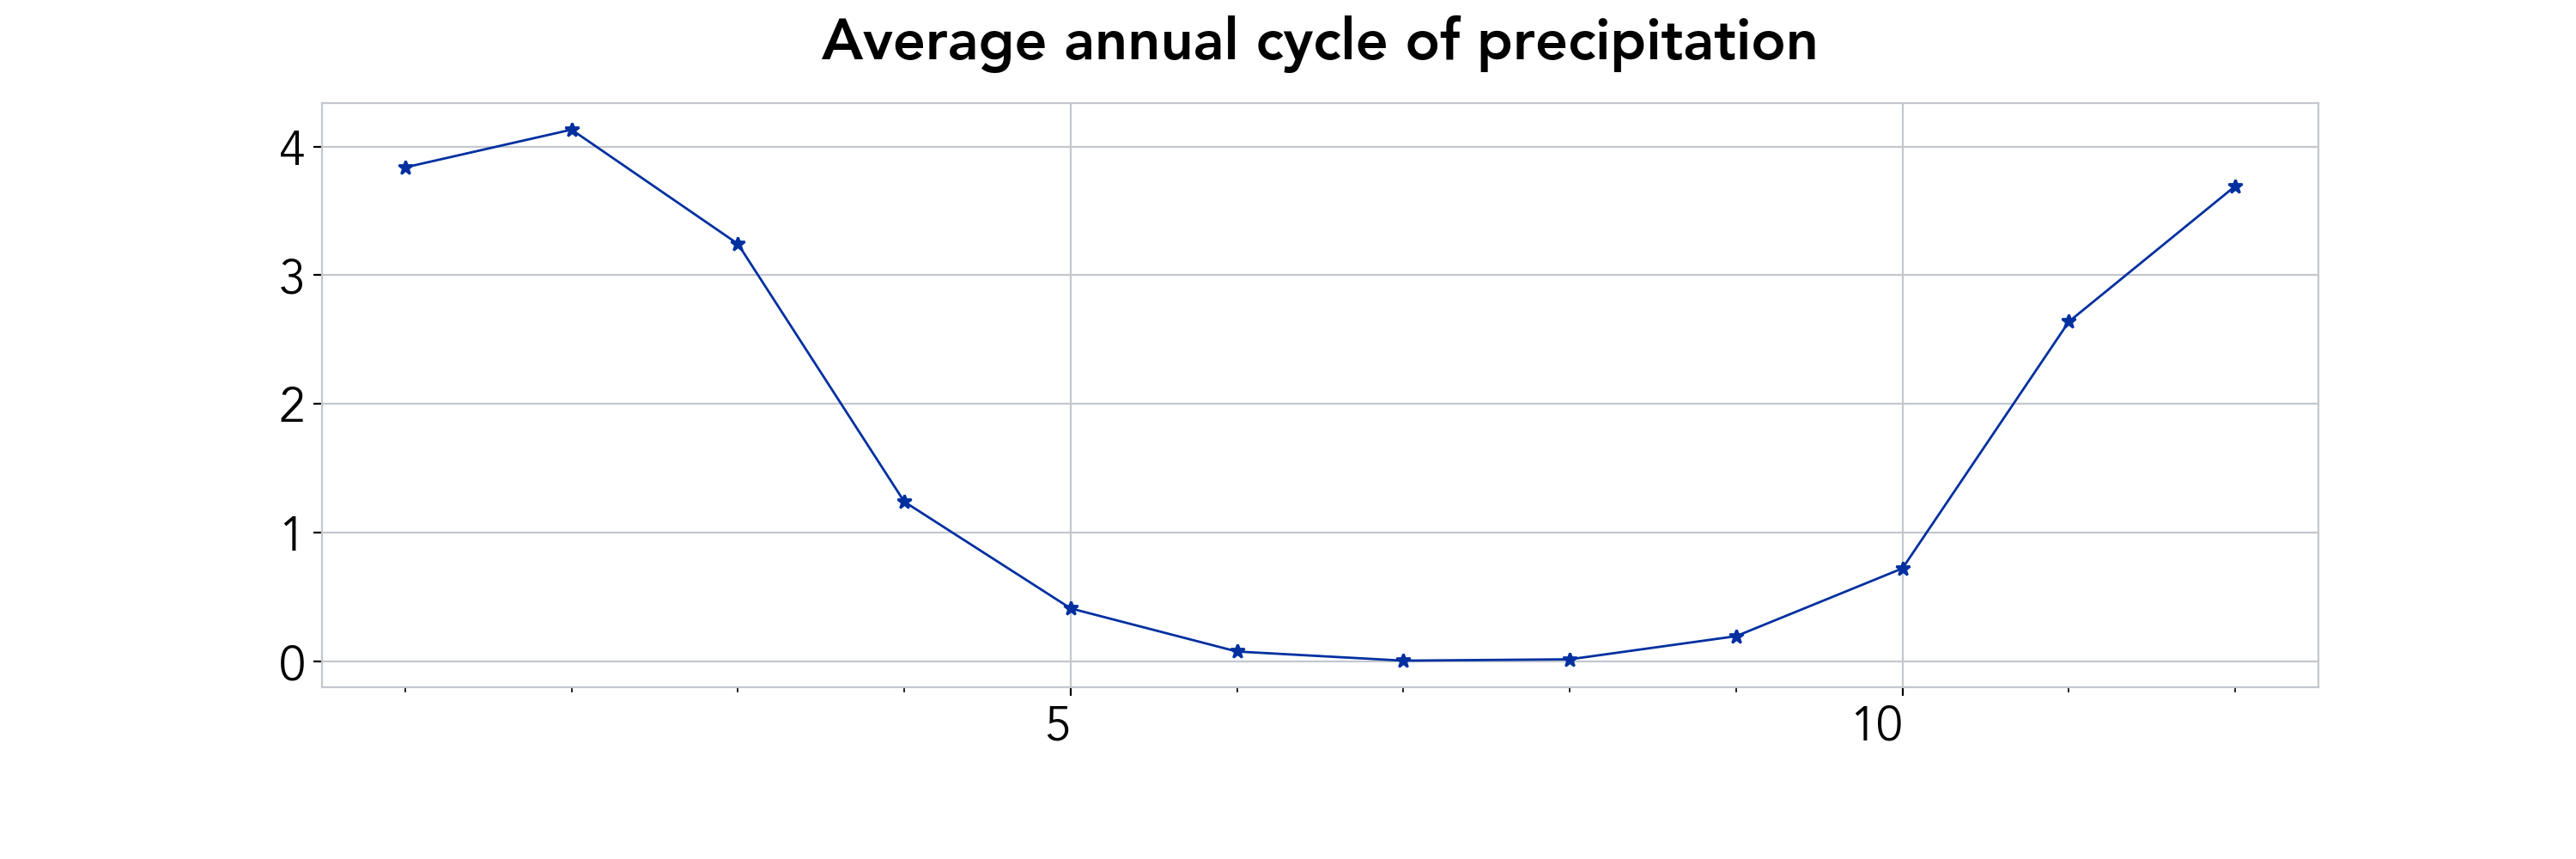

In [9]:
make_plot(data.groupby('month').mean()['precip'],dataset_key, 'Average annual cycle of precipitation')

Finally, let's look at a histogram. As we saw from the previous plots, Palo Alto has very many completely dry days. From the histogram we can see that when it does rain, it rains a lot! Almost 350 days since 1981 there has been 8-16 mm/day and near 300 days there has been 16-32 mm/day. Duing 30 days of the entire period it has been raining even 64-128 mm/day.

<IPython.core.display.Javascript object>


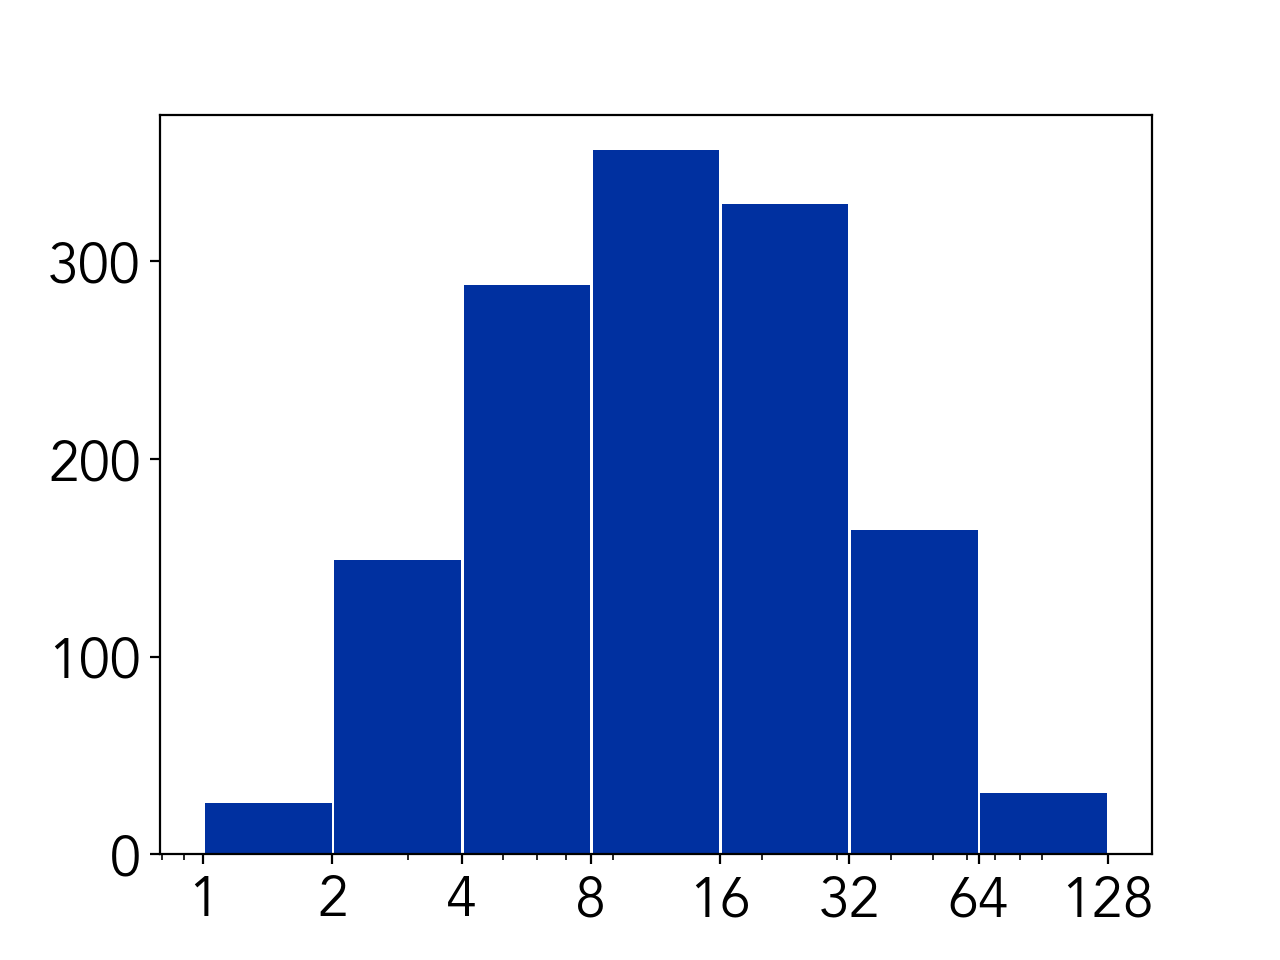

In [10]:
bins = [1,2,4,8,16,32,64,128]
make_histogram(data['precip'],bins)